##  Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, normaltest
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('/content/Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [3]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [4]:
# Unique values & their count
df.nunique()

,0
Company,6
Age,29
Salary,40
Place,11
Country,1
Gender,2


In [5]:
df.value_counts()

Company                    Age   Salary  Place     Country  Gender
Infosys                    22.0  8787.0  Calcutta  India    1         2
TCS                        21.0  4824.0  Mumbai    India    0         2
CTS                        0.0   1234.0  Calcutta  India    0         1
TCS                        0.0   9024.0  Chennai   India    1         1
                           23.0  4824.0  Calcutta  India    0         1
                                                                     ..
Infosys                    22.0  8202.0  Cochin    India    0         1
                           21.0  3030.0  Calcutta  India    0         1
                           0.0   3234.0  Mumbai    India    0         1
                                 3030.0  Calcutta  India    0         1
Tata Consultancy Services  31.0  8345.0  Mumbai    India    0         1
Name: count, Length: 91, dtype: int64

In [6]:
# Basic statistics
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


## Data Cleaning

In [9]:
# Finding missing values
df.isnull().sum()

,0
Company,8
Age,18
Salary,24
Place,14
Country,0
Gender,0


In [10]:
# Standardizing company names
df['Company'] = df['Company'].replace({
    'Tata Consultancy Services': 'TCS',
    'Congnizant': 'CTS',
    'Infosys Pvt Lmt': 'Infosys'
})

In [11]:
# Detect and remove duplicates
df.duplicated().sum()

4

In [12]:
df.drop_duplicates(inplace=True)
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


0

In [13]:
# removing outliers using IQR
Q1 = df[['Age', 'Salary']].quantile(0.25)
Q3 = df[['Age', 'Salary']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Age', 'Salary']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# Replacing Age 0 with NaN
df['Age'] = df['Age'].replace(0, pd.NA)

In [15]:
# Filling missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Filling numeric missing values with median
df.fillna(df.mode().iloc[0], inplace=True)  # Filling categorical missing values with mode

<ipython-input-15-be90828ca190>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mode().iloc[0], inplace=True)  # Filling categorical missing values with mode


## Data Analysis

In [16]:
# Filtering data (Age > 40 and Salary < 5000)
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


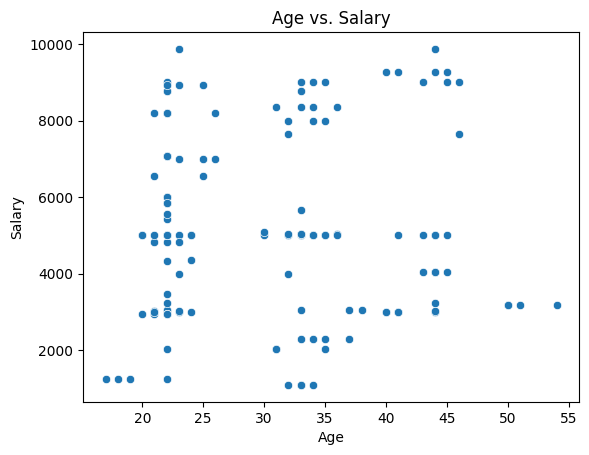

In [17]:
# Scatter Plot: Age vs. Salary
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.title("Age vs. Salary")
plt.show()

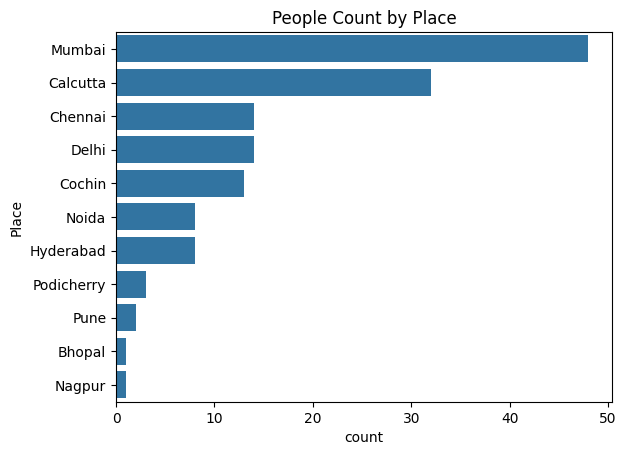

In [18]:
# Bar chart: People count per place
sns.countplot(y=df['Place'], order=df['Place'].value_counts().index)
plt.title("People Count by Place")
plt.show()

## Data Encoding

In [19]:
# categorical columns

categorical_cols = ['Company', 'Place', 'Country']

In [20]:
# Apply Label Encoding (for categorical columns with few unique values)

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
# Apply One-Hot Encoding (for categorical variables with more categories)

df = pd.get_dummies(df, columns=['Company', 'Place'], drop_first=True)

In [22]:
df.head()

,Age,Salary,Country,Gender,Company_1,Company_2,Place_1,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10
0,20.0,5000.0,0,0,False,True,False,True,False,False,False,False,False,False,False,False
1,30.0,5000.0,0,0,True,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.0,0,0,False,True,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,0,0,True,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.0,0,0,False,True,False,False,False,False,False,True,False,False,False,False


## Feature Scaling

In [23]:
# Numerical columns (excluding categorical one-hot encoded columns)

num_cols = ['Age', 'Salary']

In [24]:
# Applying StandardScaler

scaler_std = StandardScaler()
df[['Age_Std', 'Salary_Std']] = scaler_std.fit_transform(df[num_cols])

In [25]:
# Applying MinMaxScaler

scaler_minmax = MinMaxScaler()
df[['Age_MinMax', 'Salary_MinMax']] = scaler_minmax.fit_transform(df[num_cols])

In [26]:
df.head()

,Age,Salary,Country,Gender,Company_1,Company_2,Place_1,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10,Age_Std,Salary_Std,Age_MinMax,Salary_MinMax
0,20.0,5000.0,0,0,False,True,False,True,False,False,False,False,False,False,False,False,-1.160646,-0.100827,0.081081,0.445089
1,30.0,5000.0,0,0,True,False,False,False,False,False,False,True,False,False,False,False,-0.048650,-0.100827,0.351351,0.445089
2,35.0,2300.0,0,0,False,True,True,False,False,False,False,False,False,False,False,False,0.507348,-1.243735,0.486486,0.137817
3,40.0,3000.0,0,0,True,False,False,False,False,True,False,False,False,False,False,False,1.063346,-0.947426,0.621622,0.217480
4,23.0,4000.0,0,0,False,True,False,False,False,False,False,True,False,False,False,False,-0.827047,-0.524127,0.162162,0.331285
